# K-means

Simple clustering using K-means algorithm.

## 1. Data preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
nb_samples = 1000
dim_features = 2

data1 = np.random.normal([4,4], [1,2], (nb_samples,dim_features))
data2 = np.random.normal([-4,-4], [1,2], (nb_samples,dim_features))
data3 = np.random.normal([-4,4], [1,2], (nb_samples,dim_features))

label1 = 0 * np.ones(nb_samples) # cluster 1 
label2 = 1 * np.ones(nb_samples) # cluster 2
label3 = 2 * np.ones(nb_samples) # cluster 3

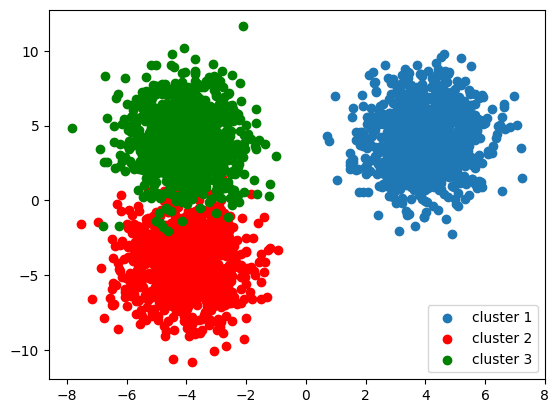

In [3]:
plt.scatter(data1[:, 0], data1[:, 1])
plt.scatter(data2[:, 0], data2[:, 1], c='r')
plt.scatter(data3[:, 0], data3[:, 1], c='g')
plt.legend(['cluster 1', 'cluster 2', 'cluster 3'])

In [120]:
X = np.concatenate([data1, data2, data3])
y = np.concatenate([label1, label2, label3])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2. Training functions

In [22]:
def calculate_distance(centroids, data):
    k = centroids.shape[0]
    nb_samples = data.shape[0]
    distances = np.zeros(shape=(k, nb_samples))
    for i in range(k):
        for j in range(nb_samples):
            distances[i, j] = np.mean((centroids[i] - data[j]) ** 2)
    return distances

In [42]:
def assign_centroid(distances):
    nb_samples = distances.shape[1]
    assigned_centroid = np.zeros(shape=nb_samples)
    for i in range(nb_samples):
        assigned_centroid[i] = distances[:, i].argmin()
    return assigned_centroid

In [129]:
def update_centroids(data, assigned_centroid):
    dim_features = data.shape[1]
    k = int(assigned_centroid.max()) + 1
    nb_samples = data.shape[0]
    centroids = np.zeros(shape=(k, dim_features))
    for i in range(k):
        mask = []
        for j in range(nb_samples):
            if assigned_centroid[j] == i:
                mask.append([True] * dim_features)
            else:
                mask.append([False] * dim_features)
        centroids[i] = np.mean(data, axis=0, where=mask)
    return centroids

In [156]:
n = 100
k = 3
centroids = np.random.random(size=(k, dim_features))

for i in range(n):
    distances = calculate_distance(centroids, X_train)
    assigned_centroid = assign_centroid(distances)
    centroids = update_centroids(X_train, assigned_centroid)

In [158]:
print(centroids)

[[-4.04127887  4.00497318]
 [ 3.99678245  4.08266286]
 [-4.04296114 -4.18773924]]


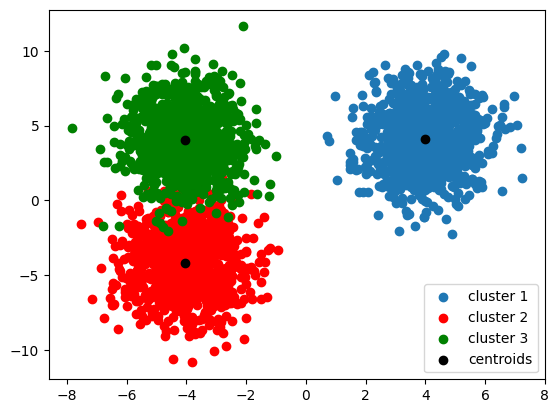

In [169]:
plt.scatter(data1[:, 0], data1[:, 1])
plt.scatter(data2[:, 0], data2[:, 1], c='r')
plt.scatter(data3[:, 0], data3[:, 1], c='g')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black')
plt.legend(['cluster 1', 'cluster 2', 'cluster 3', 'centroids'])

## 4. Comparison with scikit-learn

In [159]:
from sklearn.cluster import KMeans

In [165]:
kmeans = KMeans(n_clusters=3)

In [166]:
kmeans.fit(X_train)

/Users/raphaelperri/opt/anaconda3/envs/torch-gpu/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [168]:
centroids_sk = kmeans.cluster_centers_

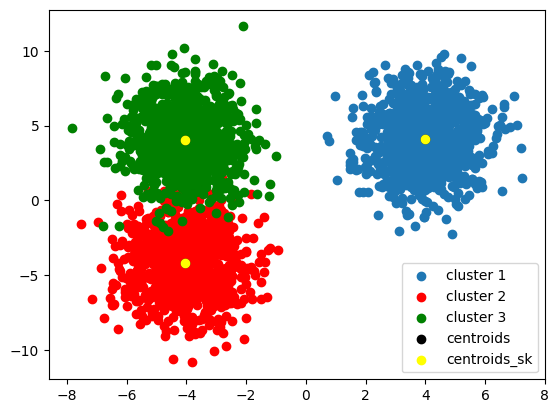

In [174]:
plt.scatter(data1[:, 0], data1[:, 1])
plt.scatter(data2[:, 0], data2[:, 1], c='r')
plt.scatter(data3[:, 0], data3[:, 1], c='g')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black')
plt.scatter(centroids_sk[:, 0], centroids_sk[:, 1], c='yellow')
plt.legend(['cluster 1', 'cluster 2', 'cluster 3', 'centroids', 'centroids_sk'])